In [51]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [40]:
f = open('/Users/jeon-yewon/Desktop/데이터 분석 강의/부트캠프/11주차/train.txt', 'r')

tagged_sentences = [] # 전체 문장에 대한 단어와 태그를 저장할 리스트
sentence = [] # 현재 문장에 대한 단어와 태그를 저장할 리스트

for line in f:
    #print(line)
    if len(line) == 0 or line.startswith('-DOCSTART') or line[0] == '\n': # 문장의 끝
        if len(sentence) > 0: # sentence가 비어있지 않은지?
            tagged_sentences.append(sentence)
            sentence = []
        continue

    splits = line.split(' ') # [EU, NNP, B-NP, B-ORG\n]
    splits[-1] = re.sub(r'\n', '', splits[-1]) # 줄바꿈 문자 제거 -> B-ORG\n -> B-ORG
    word = splits[0].lower() # EU -> eu
    sentence.append([word, splits[-1]]) # 단어와 개체명 태깅 [eu, B-ORG]

In [41]:
print('전체 샘플 : ', len(tagged_sentences))

전체 샘플 :  14041


In [42]:
print(tagged_sentences[0])

[['eu', 'B-ORG'], ['rejects', 'O'], ['german', 'B-MISC'], ['call', 'O'], ['to', 'O'], ['boycott', 'O'], ['british', 'B-MISC'], ['lamb', 'O'], ['.', 'O']]


In [47]:
sentences, ner_tags = [], []

for tagged_sentence in tagged_sentences:
    sentence, tag_info = zip(*tagged_sentence)
    sentences.append(list(sentence))
    ner_tags.append(list(tag_info))

In [48]:
print(len(sentences), len(ner_tags))
print(sentences[0], ner_tags[0])

14041 14041
['eu', 'rejects', 'german', 'call', 'to', 'boycott', 'british', 'lamb', '.'] ['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O']


In [49]:
print('최대 길이 : ', max(len(l) for l in sentences))
print('평균 길이 : ', (sum(map(len, sentences))/len(sentences)))

최대 길이 :  113
평균 길이 :  14.501887329962253


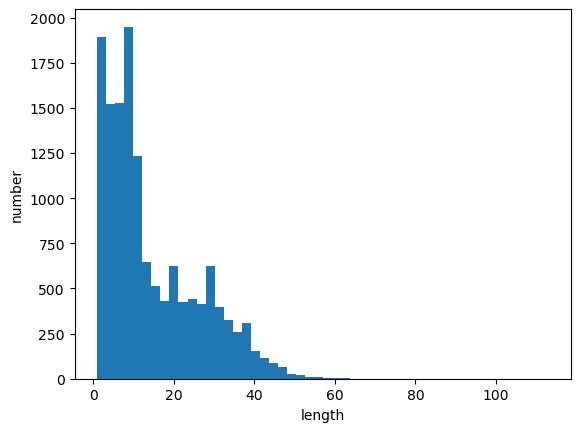

In [52]:
plt.hist([len(s) for s in sentences], bins=50)
plt.xlabel('length')
plt.ylabel('number')
plt.show()

In [56]:
max_words = 4000

src_tokenizer = Tokenizer(num_words=max_words, oov_token='OOV')
src_tokenizer.fit_on_texts(sentences)
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(ner_tags)

In [57]:
vocab_size = max_words
tag_size = len(tar_tokenizer.word_index) + 1

print('단어 집합 크기 : ', vocab_size)
print('태깅 집합 크기 : ', tag_size)

단어 집합 크기 :  4000
태깅 집합 크기 :  10


In [58]:
X_train = src_tokenizer.texts_to_sequences(sentences)
y_train = tar_tokenizer.texts_to_sequences(ner_tags)

In [59]:
print(X_train[0], y_train[0])

[989, 1, 205, 629, 7, 3939, 216, 1, 3] [4, 1, 7, 1, 1, 1, 7, 1, 1]


In [60]:
index_to_word = src_tokenizer.index_word
index_to_ner = tar_tokenizer.index_word

In [61]:
decoded = []

for index in X_train[0]:
    decoded.append(index_to_word[index])

print('기존 문장 : ', sentences[0])
print('OOV가 처리된 문장 : ', decoded)

기존 문장 :  ['eu', 'rejects', 'german', 'call', 'to', 'boycott', 'british', 'lamb', '.']
OOV가 처리된 문장 :  ['eu', 'OOV', 'german', 'call', 'to', 'boycott', 'british', 'OOV', '.']


In [62]:
max_len = 70

X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
y_train = pad_sequences(y_train, padding='post', maxlen=max_len)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [64]:
y_train = to_categorical(y_train, num_classes=tag_size)
y_test = to_categorical(y_test, num_classes=tag_size)

In [65]:
print(X_train.shape, X_test.shape)
print(y_train, y_test)

(11232, 70) (2809, 70)
[[[0. 1. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 1. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 1. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 1. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 1. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ...

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, TimeDistributed
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [66]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))
model.add(Bidirectional(LSTM(256, return_sequences='softmax')))
model.add(TimeDistributed(Dense(tag_size, activation='softmax')))

model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 70, 128)           512000    
                                                                 
 bidirectional (Bidirection  (None, 70, 512)           788480    
 al)                                                             
                                                                 
 time_distributed (TimeDist  (None, 70, 10)            5130      
 ributed)                                                        
                                                                 
Total params: 1305610 (4.98 MB)
Trainable params: 1305610 (4.98 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- binary_crossentropy : 이진 분류(한 클래스에 속할 확률 반환)
- categorical_crossentropy : 다중 분류(각 클래스에 대한 확률)
- sparse_crossentropy : 다중 분류(정수형태(원-핫 인코딩x))
- MSE, MAE : 회귀 문제에서 사용

In [69]:
# Early stopping to stop training when the model's performance stops improving
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Model checkpoint to save the best model during training
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [71]:
history = model.fit(X_train, y_train, 
                    batch_size=128, 
                    epochs=10, 
                    validation_data=(X_test, y_test), 
                    callbacks=[es, mc])

Epoch 1/10
88/88 [==============================] - ETA: 0s - loss: 0.1464 - acc: 0.9650
Epoch 1: val_loss improved from inf to 0.11615, saving model to best_model.h5
88/88 [==============================] - 92s 1s/step - loss: 0.1464 - acc: 0.9650 - val_loss: 0.1162 - val_acc: 0.9665
Epoch 2/10


/Users/jeon-yewon/miniforge3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


88/88 [==============================] - ETA: 0s - loss: 0.0974 - acc: 0.9707
Epoch 2: val_loss improved from 0.11615 to 0.08282, saving model to best_model.h5
88/88 [==============================] - 91s 1s/step - loss: 0.0974 - acc: 0.9707 - val_loss: 0.0828 - val_acc: 0.9758
Epoch 3/10
88/88 [==============================] - ETA: 0s - loss: 0.0734 - acc: 0.9781
Epoch 3: val_loss improved from 0.08282 to 0.06781, saving model to best_model.h5
88/88 [==============================] - 84s 952ms/step - loss: 0.0734 - acc: 0.9781 - val_loss: 0.0678 - val_acc: 0.9808
Epoch 4/10
88/88 [==============================] - ETA: 0s - loss: 0.0579 - acc: 0.9831
Epoch 4: val_loss improved from 0.06781 to 0.05430, saving model to best_model.h5
88/88 [==============================] - 95s 1s/step - loss: 0.0579 - acc: 0.9831 - val_loss: 0.0543 - val_acc: 0.9846
Epoch 5/10
88/88 [==============================] - ETA: 0s - loss: 0.0440 - acc: 0.9875
Epoch 5: val_loss improved from 0.05430 to 0.0446

In [74]:
print('test acc : ', model.evaluate(X_test, y_test)[1])

88/88 [==============================] - 9s 99ms/step - loss: 0.0345 - acc: 0.9909
test acc :  0.9908660650253296


In [79]:
i = 10

y_pred = model.predict(np.array([X_test[i]])) # 모델에서 y_test를 예측
# print('확률값 벡터 : ', y_pred)
y_pred = np.argmax(y_pred, axis=-1) # 확률값 벡터를 정수 인코딩으로 변경
true = np.argmax(y_test[i], -1) # 원-핫 벡터를 정수 인코딩으로 변경

# print('원-핫 벡터 : ', y_test[i])
# print('확률값 벡터의 정수 인코딩 : ', y_pred)
# print('원-핫 벡터의 정수 인코딩 : ', true)
print('{:15}|{:5}|{}'.format('단어', '실제값', '예측값'))
print('-'*35)

for w, t, pred in zip(X_test[i], true, y_pred[0]):
    if w != 0:
        print('{:17}: {:7} {}'.format(index_to_word[w], index_to_ner[t].upper(), index_to_ner[pred].upper()))

1/1 [==============================] - 0s 21ms/step
단어             |실제값  |예측값
-----------------------------------
els              : B-PER   B-PER
OOV              : I-PER   I-PER
(                : O       O
belgium          : B-LOC   B-LOC
)                : O       O
beat             : O       O
OOV              : B-PER   B-PER
OOV              : I-PER   I-PER
(                : O       O
australia        : B-LOC   B-LOC
)                : O       O
6-4              : O       O
